# MCMC ASSIGNMENT - 4

# Question - 1

$ Var(\bar{X}) = \frac{Var(\sum_{i=1}^{\infty}X_{i})}{n^2} $                        
$ = \frac{Var(X_{1})}{n} = \frac{Var(F)}{n} $   (All $X_{i}$ are iid)  

$ Var(\bar{Y}) = \frac{Var(\sum_{i=1}^{\infty}Y_{i})}{n^2} $                        

$Using \ the \ relation \ :  \textrm{Var}\left(\sum_{i=1}^{n} Y_i\right)=\sum_{i=1}^{n} \textrm{Var}(Y_i)+2 \sum_{i<j} \textrm{Cov}(Y_i,Y_j) \\$
$ \frac{\textrm{Var}\left(\sum_{i=1}^{n} Y_i\right)}{n^2}= \frac{\sum_{i=1}^{n} \textrm{Var}(Y_i)}{n^2}+2 \frac{\sum_{i<j} \textrm{Cov}(Y_i,Y_j)}{n^2} \\ $

$ \textrm{Var}(Y_i) = \textrm{Var}(F)$ (since $Y_i$  is a  a term of the markov chain and if the first draw  $Y_1$ is from the distribution of F, rest of the draws are also from the stationary distribution.This is from the property of the Markov transition kernel.) 

Now we can clearly see that: $ Var(\bar{Y}) =Var(\bar{X}) + 2 \frac{\sum_{i<j} \textrm{Cov}(Y_i,Y_j)}{n^2} \\ $

This implies that in general the variance of $\bar{X}$ is less than the variance of $\bar{Y}$. But when $n \to \infty$ then from the W.L.L.N. and Markov Chain law of large numbers $ \bar{x} \to E(F) \ and \ \bar{Y} \to E(F) $. 


# Question - 2

# a) Joint posterior distribution of (𝜇, $ \nu $)

$ f(\mu,\nu | Y) \propto f(Y|\mu,\nu)f(\mu|\nu)f(\nu) \propto e^{ \sum_{i=1}^{N} \frac{(X_{i}-\mu)^2}{2}} \frac{\Gamma(\frac{\nu+1}{2})}{\Gamma(\nu/2)} \frac{(1+\mu^2/\nu)^\frac{-(\nu+1)}{2}}{\nu^{0.5}} \nu^{a_{0}-1}e^{-\frac{\nu}{b_{0}}}I_{\nu}(2,\infty)      $


# b)  MH algorithm to sample from the above posterior $ $distribution


The joint posterior distribution which is our target is a function of  $\mu \ and \ \nu $. We set the initial value of $\nu $ as  $\nu_1 $=2. Since the prior distribution for $\nu $ was gamma truncated at 2. For $\mu $  we set the initial value $\mu_1 $ as a draw from the t distribution with  $\nu_1$ degrees of freedom.

$y_i$=($\mu_i $,$\nu_i $) 

$y_*$=($\mu_* $,$\nu_* $)

$\textbf{Algorithm} $ (for ith iteration)

1) Draw a proposal value $\nu_* $ for  $\nu_{i} $ from the $Truncated \ Gamma(a,b,(2,\infty))$.

2) Draw a proposal value $\mu_* $ for $\mu_{i} $ from the $Normal (\mu_{i-1} ,0.5)$.

3) Calculate the MH ratio :$ \alpha = min\big\{1,\frac{\pi(y^*)}{\pi(y_{i-1})}\frac{q(y_{i-1}|y_*)}{q(y_*|y_{i-1})}\big\}$

Note here $\frac{q(y_{i-1}|y_*)}{q(y_*|y_{i-1})} $ is not equal to 1. The stationary distribution for $\mu_{i} $ is symmetric and is a random walk( center of distribution changes). Therefore for $\mu_{i} $ the fraction $\frac{q(\mu_{i-1}|\mu_*)}{q(\mu_*|\mu_{i-1})}=1 $. But for $\nu_{i} $ the stationary distribution is fixed as well as non-symmetric. Therefore we calculate the fraction :

$\frac{q(\nu_{i-1}|\nu_*)}{q(\nu_*|\nu_{i-1})} = \frac{q(\nu_{i-1})}{q(\nu_*)}(a \ fixed \ distribution \ generates \ independent \ propositions) \\ = \frac{\nu_{i-1}^{a_{0}-1}e^{-\frac{\nu_{i-1}}{b_{0}}}}{\nu_*^{a_{0}-1}e^{-\frac{\nu_*}{b_{0}}}}$


$ \alpha = min\big\{1,\frac{e^{ \sum_{i=1}^{N} \frac{(X_{i}-\mu_*)^2}{2}} \frac{\Gamma(\frac{\nu_*+1}{2})}{\Gamma(\nu_*/2)} \frac{(1+\mu_*^2/\nu_*)^\frac{-(\nu_*+1)}{2}}{\nu_*^{0.5} }}{e^{ \sum_{i=1}^{N} \frac{(X_{i}-\mu_{i-1})^2}{2}} \frac{\Gamma(\frac{\nu_{i-1}+1}{2})}{\Gamma(\nu_{i-1}/2)} \frac{(1+\mu_{i-1}^2/\nu_{i-1})^\frac{-(\nu_{i-1}+1)}{2}}{\nu_{i-1}^{0.5}}}\} $

4) Draw u from $Uniform(0,\infty)$

5) if $u< \alpha $ , then accept the proposal. Set $\nu_{i} $=$\nu_* $ and $\mu_{i} $=$\mu_* $

5) Otherwise set : $\nu_{i} $=$\nu_{i-1} $ and $\mu_{i} $=$\mu_{i-1} $


# c)  n=100 data points. Set a0=2, b0=0.1, and run the MH algorithm described above.

In [1]:
using Statistics
using Distributions
using Plots
using SpecialFunctions
using StatsPlots
using StatsBase


In [2]:
#we write only those terms which will not get cancelled while taking the ratio
function target_ratio(a,b,nu,mu,x)
    l=size(x)[1]
     
# temp=gamma((nu+1)/2)/(gamma(nu/2))*((1+(mu^2)/nu)^(-(nu+1)/2)) / (nu^(0.5)) *  (nu)^(a-1)*exp(-nu/b)
  temp=(1+(mu^2)/nu)^(-(nu+1)/2)*gamma((nu+1)/2)/(gamma(nu/2)) / (nu^(0.5)) 

    for i in 1:l
        temp=exp(-((x[i]-mu)^2)/2)*temp
    
    end
    return temp
end
    

target_ratio (generic function with 1 method)

In [3]:
# initialising 
num=10000
sample_v=zeros(num,1)
sample_u=zeros(num,1)
samp_size=100
a=2
b=0.1
nu=2

sample_v[1]=nu;
mu=rand(TDist(nu),1)[1]
sample_u[1]=mu

x=zeros(samp_size,1)
for i in 1:samp_size
    x[i]=rand(Normal(mu,1))
end 

In [4]:
# ALgorithm
accept=0
 for i in 2:num
    propv=rand(truncated(Gamma(a,b),lower=2))
    
  propu=rand(Normal(sample_u[i-1],0.5))

     ratio=target_ratio(a,b,propv,propu,x)/target_ratio(a,b,sample_v[i-1],sample_u[i-1],x)
    u=rand(Uniform(0,1))
    ratio=min(1,ratio)
    if(u<ratio)
        sample_u[i]=propu;
        sample_v[i]=propv;
        accept=accept+1
    else
        sample_u[i]=sample_u[i-1];
        sample_v[i]=sample_v[i-1];
    end 
end



In [5]:
println("Mean of samples drawn using MH algorithm: ", mean(sample_u))
println("Mean from sample data X: ", mean(x))
println("Acceptance ratio of MCMC algorithm: ", accept/num)

Mean of samples drawn using MH algorithm: -1.09888109895754
Mean from sample data X: -1.1077444292807082
Acceptance ratio of MCMC algorithm: 0.2411


# Trace plot of value of $\mu$ vs Sample number

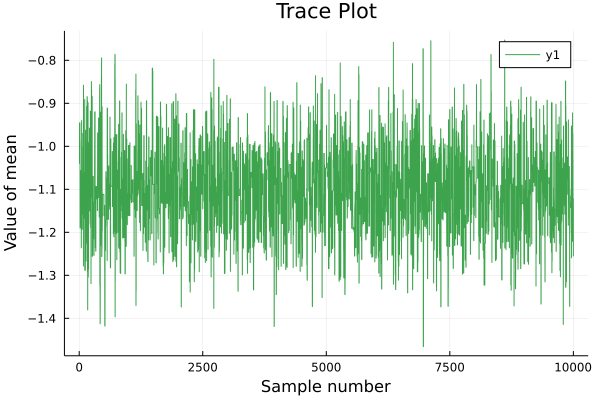

In [6]:
plot((sample_u),color=3,xlabel="Sample number",ylabel="Value of mean",title="Trace Plot")

# Trace plot of value of $\nu$ vs Sample number

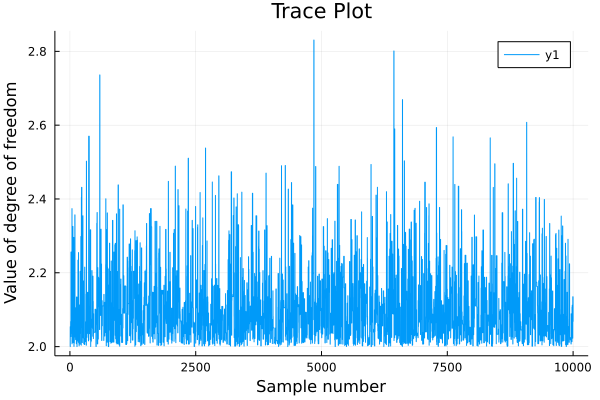

In [7]:
plot((sample_v),color=1,xlabel="Sample number",ylabel="Value of degree of freedom", title="Trace Plot")

# ACF vs lag plot for $\mu$ 

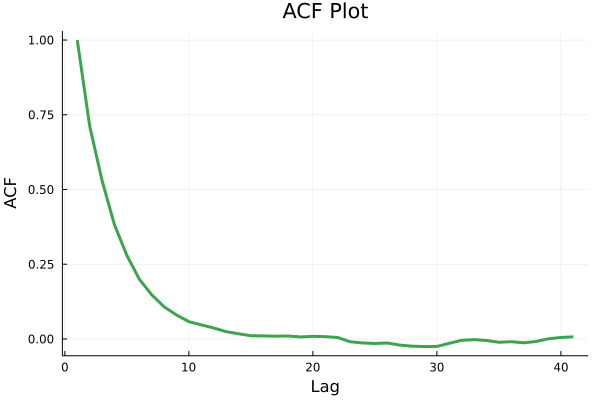

In [8]:
plot(autocor(sample_u),lw=3,color=3,label="",xlabel="Lag",ylabel="ACF",title="ACF Plot")

# ACF vs lag plot for  $\nu$ 

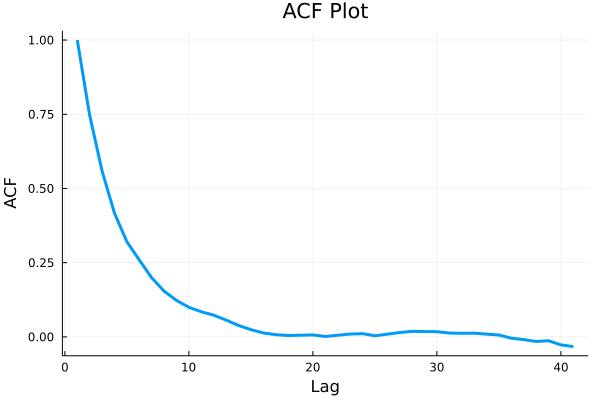

In [9]:
plot(autocor(sample_v),lw=3,color=1,label="",xlabel="Lag",ylabel="ACF",title="ACF Plot")

# Question - 3

# a) Posterior distribution of (𝛽, $𝜎^2$)

${\pi\big((\beta,\sigma^2)| y\big) \propto \pi(\beta , \sigma^2) f\big(y | (\beta,\sigma^2)\big) } =\pi(\beta) \pi( \sigma^2) f\big(y | (\beta,\sigma^2)\big) \\ $

$=(\sigma^2)^{(-p/2)})\big(\exp(-\frac{((\beta-\mu)^\intercal(\beta-\mu)}{2\sigma^2}\big)) (\sigma^2)^{-(a+1)}\exp(\frac{-b}{\sigma^2})  (\sigma^2)^{(-\frac{n}{2})}\Big(\exp\big(-\frac{(y-X\beta)^\intercal(y-X\beta)}{2\sigma^2}\big)\Big) \\ $

$ =(\sigma^2)^{(-p/2-n/2-a-1)}    \Big(\exp\big(-\frac{  (\beta-\mu)^\intercal(\beta-\mu)+ (y-X\beta)^\intercal(y-X\beta)+2b )   }{2\sigma^2}\big)\Big)      $                         

# b) MH algorithm to sample from the posterior distribution for Boston-housing dataset

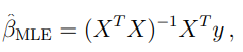

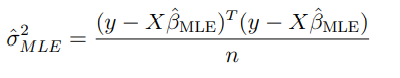

The joint posterior distribution which is our target distribution is a function of  $\beta \ and \ \sigma^2 $. We set the initial value $\beta_1 \ and \ \sigma_1^2 $ as  equal to their MLE. Now we have to set the value of a,b and $\mu $ which depends on the data set. Now since the prior distribution of $\beta \ is \ Normal(\mu,\sigma^2 Ip)$ therefore we set $\mu $=$\beta_1 $. We set a=2 and b= $\sigma_1^2 $

$y_i$=($\beta_i $,$\sigma^2_i $) 

$y_*$=($\beta_* $,$\sigma^2_* $)

$\textbf{Algorithm} $ (for ith iteration)

1) Draw a proposal value $\beta_* $ for  $\beta_{i} $ from the $Normal(\beta_{i-1},sigma))$.

2) Draw a proposal value $\sigma^2_* $ for $\sigma^2_{i} $ from the $InverseGamma(a,b)$.

3) Calculate the MH ratio :$ \alpha = min\big\{1,\frac{\pi(y^*)}{\pi(y_{i-1})}\frac{q(y_{i-1}|y_*)}{q(y_*|y_{i-1})}\big\}$

Note here $\frac{q(y_{i-1}|y_*)}{q(y_*|y_{i-1})} $ is not equal to 1. The stationary distribution for $\beta_{i} $ is symmetric and is a random walk( center of distribution changes). Therefore for $\beta_{i} $ the fraction $\frac{q(\beta_{i-1}|\beta_*)}{q(\beta_*|\beta_{i-1})}=1 $. But for $\sigma^2_{i} $ the stationary distribution is fixed as well as non-symmetric. Therefore we calculate the fraction :

$\frac{q(\sigma^2_{i-1}|\nu_*)}{q(\sigma^2_*|\sigma^2_{i-1})} = \frac{q(\sigma^2_{i-1})}{q(\sigma^2_*)}(a \ fixed \ distribution \ generates \ independent \ propositions) \\ = \frac{(\sigma_{i-1}^2)^{-(a+1)}\exp(\frac{-b}{\sigma_{i-1}^2}) }{(\sigma_*^2)^{-(a+1)}\exp(\frac{-b}{\sigma_*^2}) }$


$ \alpha = min\big\{1,\frac{(\sigma_*^2)^{(-p/2-n/2)}    \Big(\exp\big(-\frac{  (\beta_*-\mu)^\intercal(\beta_*-\mu)+ (y-X\beta_*)^\intercal(y-X\beta_*) )   }{2\sigma_*^2}\big)\Big) }{(\sigma_{i-1}^2)^{(-p/2-n/2)}    \Big(\exp\big(-\frac{  (\beta_{i-1}-\mu)^\intercal(\beta_{i-1}-\mu)+ (y-X\beta_{i-1})^\intercal(y-X\beta_{i-1}) )   }{2\sigma_{i-1}^2}\big)\Big) } $

4) Draw u from $Uniform(0,\infty)$

5) if $u< \alpha $ , then accept the proposal. Set $\beta_{i} $=$\beta_* $ and $\sigma^2_{i} $=$\sigma^2_* $

5) Otherwise set : $\beta_{i} $=$\beta_{i-1} $ and $\sigma^2_{i} $=$\sigma^2_{i-1} $


In [10]:
using CSV
using DataFrames
using LinearAlgebra
data=CSV.read(download("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"),DataFrame); #Load the Dataset (Boston Housing)
n=60

60

In [11]:
y=data[1:n,14]
x=select(data,Not([:chas, :medv]))
x=x[1:n,:]
x=Matrix(x);

In [12]:
p=12
#normalising the different column values
for i in 1:p
    x[:,i]=x[:,i]./sqrt(sum(x[:,i].^2));
end
y=y./sqrt(sum(y.^2));

In [13]:
#following 2 are the mle values
beta= (inv(transpose(x)*x)*transpose(x)*y)
sigma=sum((y.-x*beta).^2)/n

#initialising

mu=beta
b=sigma
a=2

num=10000

sample_s=zeros(num) 
sample_b=zeros(num,p)
sample_s[1]=sigma
sample_b[1,:]=beta
prop_b=zeros(p,1)
prop_s=0


    
# for i in 1:p
#  sample_b[1,i]= rand(Normal(mu[i],sigma))
    
# end

# sample_b[1,:]=beta
# println(sigma)
# println(beta)
# sample_b[1,:]= rand(Normal(mean(mu),sigma),p)
# sample_b[1,:]= beta
#b seems to represents qualitatively the position of the most likely value of sigma^2
#a represnts the shape parameter

0

In [14]:
function target_ratio(a,b,mu,sigma,beta,x,y) 
    n=size(x)[1]
    p=size(x)[2]
    
    t1=sum((y.-x*beta).^2)
    t2=sum((beta.-mu).^2)
    
#     temp=exp((-temp1-temp2-2*b)/(2*sigma))* (sigma)^(-n/2-p/2-a-1)
    
 temp=exp((-t1-t2)/(2*sigma))* (sigma)^(-n/2-p/2)
    return temp
   
end

target_ratio (generic function with 2 methods)

In [15]:
#Algorithm
accept=0
for i in 2:num
    for j in 1:p
        prop_b[j]=rand(Normal(sample_b[i-1,j],sigma))
    end 
#     prop_s=rand(Normal(sample_s[i-1],1))
prop_s=rand(InverseGamma(a,b))
    
    ratio=target_ratio(a,b,mu,prop_s,prop_b,x,y)/target_ratio(a,b,mu,sample_s[i-1],sample_b[i-1,:],x,y)
    
    
    u=rand(Uniform(0,1))

    ratio=min(1,ratio)
    
    
    if(u<ratio)
        sample_s[i]=prop_s
        sample_b[i,:]=prop_b
        accept=accept+1
    else
        sample_s[i]=sample_s[i-1]
        sample_b[i,:]=sample_b[i-1,:]
    end 
        
end

In [16]:
println("Acceptance Ratio: ", accept/num)

Acceptance Ratio: 0.2188


# Trace plot of value of  $\sigma^2 $  vs Sample number¶

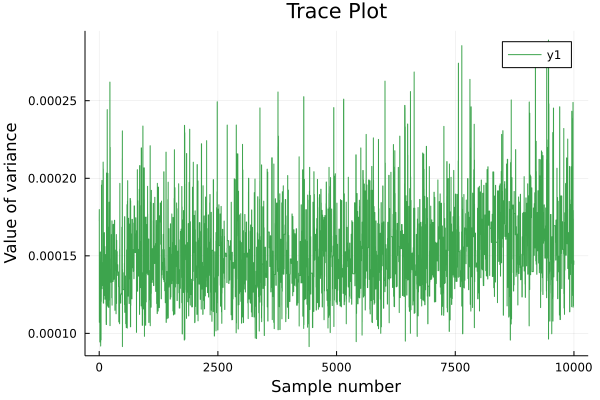

In [17]:
plot(sample_s,color=3,xlabel="Sample number",ylabel="Value of variance",title="Trace Plot")

#  ACF vs lag plot for $\sigma^2 $ 


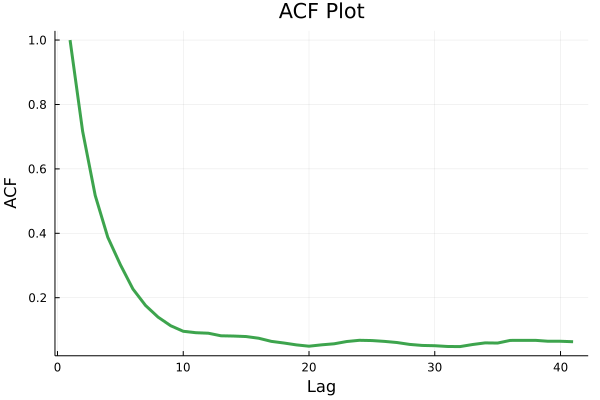

In [18]:
plot(autocor(sample_s),lw=3,color=3,label="",xlabel="Lag",ylabel="ACF",title="ACF Plot")

# Trace plot of value of  $\beta $  vs Sample number for each p¶

In [19]:
collect=[]
for i in 1:p
    push!(collect,sample_b[:,i])
end

In [20]:
plot(collect, layout=(4, 3))

# Density plot of value of  $\beta $  vs Sample number for each p¶

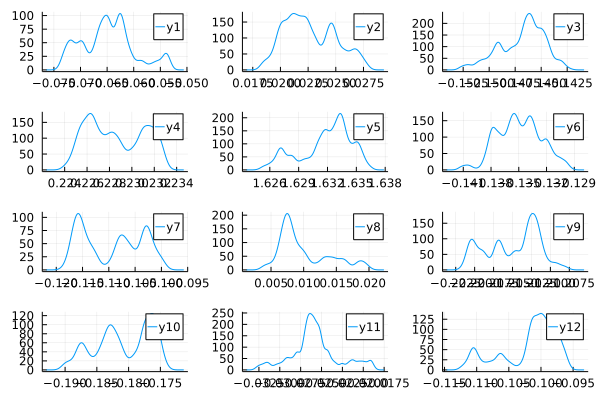

In [21]:
density((collect), layout=(4, 3))

# ACF vs lag plot for $\beta $ for each p


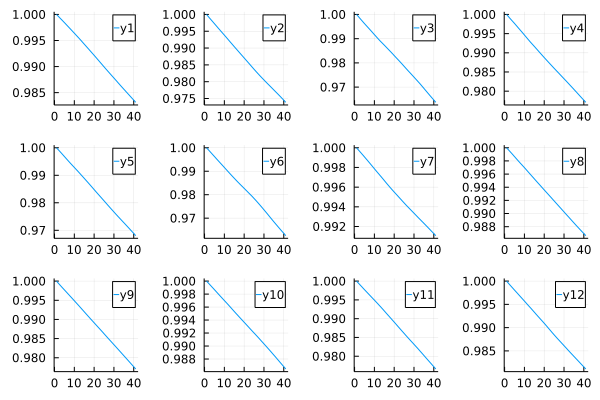

In [22]:

    plot(autocor(sample_b[:,:]),layout=(3,4))


References: https://dvats.github.io/assets/course/mth511/notes/W12L28_notes.pdf

https://dvats.github.io/assets/course/mth511/notes/W6L14_notes.pdf

https://dvats.github.io/assets/course/mth511/notes/W12L26_notes.pdf


